In [1]:
# -*- coding: utf-8 -*-

# This is a report using the data from IQAASL.
# IQAASL was a project funded by the Swiss Confederation
# It produces a summary of litter survey results for a defined region.
# These charts serve as the models for the development of plagespropres.ch
# The data is gathered by volunteers.
# Please remember all copyrights apply, please give credit when applicable
# The repo is maintained by the community effective January 01, 2022
# There is ample opportunity to contribute, learn and teach
# contact dev@hammerdirt.ch

# Dies ist ein Bericht, der die Daten von IQAASL verwendet.
# IQAASL war ein von der Schweizerischen Eidgenossenschaft finanziertes Projekt.
# Es erstellt eine Zusammenfassung der Ergebnisse der Littering-Umfrage für eine bestimmte Region.
# Diese Grafiken dienten als Vorlage für die Entwicklung von plagespropres.ch.
# Die Daten werden von Freiwilligen gesammelt.
# Bitte denken Sie daran, dass alle Copyrights gelten, bitte geben Sie den Namen an, wenn zutreffend.
# Das Repo wird ab dem 01. Januar 2022 von der Community gepflegt.
# Es gibt reichlich Gelegenheit, etwas beizutragen, zu lernen und zu lehren.
# Kontakt dev@hammerdirt.ch

# Il s'agit d'un rapport utilisant les données de IQAASL.
# IQAASL était un projet financé par la Confédération suisse.
# Il produit un résumé des résultats de l'enquête sur les déchets sauvages pour une région définie.
# Ces tableaux ont servi de modèles pour le développement de plagespropres.ch
# Les données sont recueillies par des bénévoles.
# N'oubliez pas que tous les droits d'auteur s'appliquent, veuillez indiquer le crédit lorsque cela est possible.
# Le dépôt est maintenu par la communauté à partir du 1er janvier 2022.
# Il y a de nombreuses possibilités de contribuer, d'apprendre et d'enseigner.
# contact dev@hammerdirt.ch

# sys, file and nav packages:
import os
import datetime as dt
import csv, json

# math packages:
import pandas as pd
import numpy as np
import datetime as dt

# charting:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import ticker

from PIL import Image as PILImage
from IPython.display import Markdown as md
from IPython.display import display
import matplotlib.image as mpimg

# home brew utitilties
import resources.sr_ut as sut
import resources.chart_kwargs as ck

# when setting the code group names the defintions
# are pushed to .JSON format
def push_this_to_json(filename="", data=[]):
    with open(filename, "w") as a_file:
        json.dump(data, a_file)

(codegroupsde)=
# Codegruppen

<a href="code_groups.html"> English </a>

Das IQAASL-Projekt verwendete die Objektcodes und Beschreibungen aus der Masterliste des Marine Strategy Framework (MSFD) {cite}`mlwguidance`. Die Identifizierung von Gegenständen folgt den Protokollen der MSFD Technical Subgroup on Marine Litter. Die Hauptliste wurde auf der Grundlage der in einer Reihe von Programmen verwendeten Kategorien von Gegenständen entwickelt und ist eine der detailliertesten, die etablierte EU-Protokolle repräsentiert. Es gibt 217 Identifikationscodes, um alle bei einer Erhebung gesammelten Gegenstände zu klassifizieren. Die Objektcodes beginnen mit G1 und enden mit G217. 

## Buchhaltung für regionale Objekte

Es gibt in der Schweiz regelmässig identifizierte Artikel, die nicht in der Stammliste erscheinen. Um dies zu berücksichtigen, wurden der Masterliste 43 Codes unter dem übergeordneten Code G124 hinzugefügt. Diese Codes beginnen mit G900 und enden mit G999. 

Einige MSFD-Codes wie G124 Sonstige Artikel aus Kunststoff/Polystyrol, identifizierbar ermöglichen die Quantifizierung von nicht aufgelisteten identifizierbaren Kunststoffartikeln. Ein zusätzlicher Artikel wie G913 Schnuller kann unabhängig quantifiziert und mit dem MSFD-Code G124 verknüpft werden. Diese Arbeit wird auf dem Server erledigt und die Daten können in beiden Formen analysiert werden. 

Identifizierbare Kunststoffgegenstände wurden entweder einem zusätzlichen Code wie G913 zugeordnet, oder wenn kein anderer Code den Gegenstand beschrieb, wurde G124 verwendet. Einige Codes wurden aufgenommen, um pandemiebezogene Artikel zu erfassen, wie z.B.: 

* G901: Maske medizinisch, synthetisch, übergeordneter Code = G124: andere Artikel aus  Kunststoff/Polystyrol identifizierbar 

* G902: Maske medizinisch, Stoff, übergeordneter Code = G145: andere Textilien 

Codes und übergeordnete Codes: Berücksichtigung von regionalen Unterschieden. G902 ist mit G145 durch den Wert in der Spalte parent_code verknüpft. G937 ist über den übergeordneten Code mit G124 verknüpft. 

In [2]:
# aggregated survey data
dfAgg = pd.read_csv("resources/checked_before_agg_sdata_eos_2020_21.csv")
dfAgg["date"] = pd.to_datetime(dfAgg["date"])

# get the data:
dfCodes = pd.read_csv("resources/codes_with_group_names_2015.csv")
dfCodes["pc"] = dfCodes.parent_code.where(dfCodes.parent_code != "Parent code", "none")

# language specific
# importing german code descriptions
de_codes = pd.read_csv("resources/codes_german_Version_1.csv")

# match the indexes:
de_codes.set_index("code", inplace=True)
dfCodes.set_index("code", inplace=True)

# the surveyor designated the object as aluminum instead of metal
dfCodes.loc["G708", "material"] = "Metal"

# rename the german descriptions
for x in de_codes.index:
    dfCodes.loc[x, "description"] = de_codes.loc[x, "german"]


# translate the material
dfCodes = dfCodes[dfCodes.material.isin(['Metal', 'Chemicals', 'Cloth', 'Glass', 'Paper', 'Plastic',
       'Rubber', 'Undefined', 'Unidentified', 'Wood'])]
dfCodes["material"] = dfCodes.material.map(lambda x: sut.mat_ge[x])

# translate the code groups and columns to local
dfCodes["groupname"] = dfCodes["groupname"].map(lambda x: sut.group_names_de[x])

# rename the columns
new_names = {"description":"Objekte", "groupname":"Gruppenname", "material":"Material", "Parent code":"pc"}
dfCodes.rename(columns=new_names, inplace=True)

# the columns to display
cols_to_display = list(new_names.values())

dfCodes.loc[["G124", "G902", "G145","G937"]][cols_to_display]

Objekte              Gruppenname  \
code                                                                         
G124  Andere Kunststoff- oder Schaumstoffprodukte      nicht klassifiziert   
G902                   Medizinische Masken, Stoff  Persönliche Gegenstände   
G145                             Andere Textilien  Persönliche Gegenstände   
G937                  Pheromonköder für Weinberge           Landwirtschaft   

     Material    pc  
code                 
G124  Plastik  none  
G902    Stoff  G145  
G145    Stoff  none  
G937  Plastik  G124

### Modifikation von Artikeln nach Grösse und Materialbeschreibungen

Der IQAASL-Bericht enthält mehrere wichtige Grössen- und Materialänderungen in den Kategorien zerbrochener Kunststoff und Schaumstoff. Andere Änderungen umfassen die Erweiterung oder Einschränkung von Artikelbeschreibungen.

Zum Beispiel: 

* G96 Damenbinden, Slipeinlagen, die so verändert wurden, dass sie Tampon-Applikatoren aus Kunststoff enthalten. 
* G211 Klebebandagen, geändert von nicht klassifiziertem Material in Kunststoff. 
Um Mikrokunststoffe für dieses Projekt bestmöglich zu identifizieren und zu quantifizieren, wurden 3 Codes aus der Masterliste nach Grösse modifiziert. Codes geändert, um Objekte mit einer Grösse von weniger als 5 mm zu berücksichtigen: 

* G75 Kunststoff-/Polystyrolstücke 0 - 2,5 cm modifiziert auf 0,5 cm - 2,5 cm 
* G78 Kunststoffteile 0 - 2,5cm modifiziert auf 0,5cm - 2,5cm 
* G81 Polystyrolstücke 0 - 2,5 cm modifiziert auf 0,5 cm - 2,5 cm

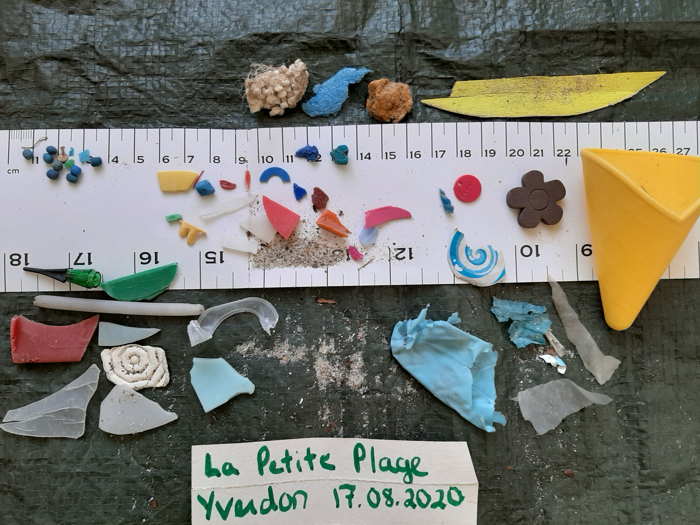

In [3]:
sut.display_image_ipython("resources/images/codegroups/20200819_080041.jpg", thumb=(700,1100), rotate=0)

*__Oben:__ Plastikteile in verschiedenen Grössen*

In [4]:
# directory listing of the group definitions
code_group2 = {
    "waste water": "wastewater.json" ,
    "micro plastics (< 5mm)":"codeListMicros.json",
    "infrastructure":"construction2.json",
    "food and drink":"foodstuff.json",
    "agriculture":"ag2.json",
    "tobacco":"tobac.json",
    "plastic pieces":"plasticpcs.json",
    "recreation":"recreation.json",    
    "packaging non food":"packaging.json",
    "personal items":"pi.json", 
    "unclassified": "nogroup.json"
}
# saving to .json
# push_this_to_json(filename=F"{project_directory}/code_group2.json", data=code_group2)

### Gfoams: Geschäumte Kunststoffe, GSchaumstoffe

Expandiertes Polystyrol G81, G82, G83, zusammengefasst als Gfoam, sind leichte, mürbe, oft weisse Schaumstoffe, die für Verpackungen oder zur Isolierung verwendet werden. Geschäumte Kunststoffartikel, die üblicherweise für Lebensmittel zum Mitnehmen G10, Schwammschäume G73 und dichtere Isolierschäume G74 verwendet werden, werden separat kategorisiert und sind nicht in der Gruppe des expandierten Polystyrols enthalten. 

Der Verpackungsschaumstoff/Isolierschaumstoff/Polyurethan G74 wurde in dieser Studie um extrudierte Polystyrole (XPS) erweitert, die üblicherweise als Isoliermaterial verwendet werden, und umgekehrt für G81, G82 und G83 Polystyrolstücke auf expandiertes Polystyrol (EPS) grösser als 0,5 cm eingegrenzt. Mit diesen Änderungen sollten Isolierschaumstoffe von Verpackungsschaumstoffen unterschieden werden, obwohl beide für eine Vielzahl von Anwendungen verwendet werden. Die Materialänderungen an den geschäumten Kunststoffen werden für die Analyse zum übergeordneten Code zusammengefasst und separat erfasst. Ein detailliertes Verzeichnis der Art und Grösse des Schaumstoffs wird mit jedem Bericht geliefert. 

:::{note}
Polystyrolkügelchen unter 5 mm, Markenname Styrofoam® sind mit Mikrokunststoffen (G117) Styropor < 5 mm gruppiert.
:::

In [5]:
wwcodes = dfCodes.loc[["G81", "G82", "G83"]][cols_to_display]
wwcodes

Objekte    Gruppenname  \
code                                                                    
G81   Schaumstoffstücke aus Polystyrol 0,5 cm - 2,5 cm  Infrastruktur   
G82        Schaumstoffstücke aus Polystyrol 2,5 - 50cm  Infrastruktur   
G83                              Styroporstücke > 50cm  Infrastruktur   

     Material    pc  
code                 
G81   Plastik  none  
G82   Plastik  none  
G83   Plastik  none

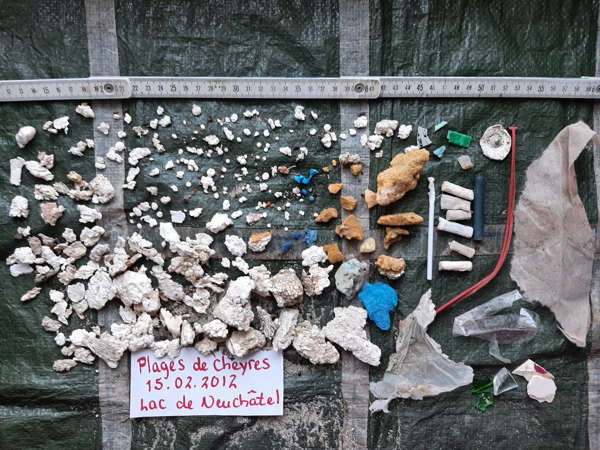

In [6]:
sut.display_image_ipython("resources/images/codegroups/20210221CheyresFoam.jpg", thumb=(600,1000), rotate=360)

*__Oben:__ Verschiedene Grössen von weissem expandiertem Polystyrol und anderen Schaumstoffen*

### Nicht anwendbar oder ausgelassene Punkte

Von den 217 verfügbaren MSFD-Codes wurden 176 in den Erhebungen 2020-2021 identifiziert. Mehrere Punkte sind nicht auf Schweizer Gewässer anwendbar, da sie sich auf die marine Aquakulturproduktion beziehen: 

* G207 Oktopus-Töpfe 
* G163 Krabben- und Hummerkörbe 
* G215 Lebensmittelabfälle/Getränkeabfälle*

*__Unten:__ Alle natürlich biologisch abbaubaren Lebensmittelabfälle sowie die Sammlung und Quantifizierung von Fäkalien wurden bei diesem Projekt ausgelassen.*

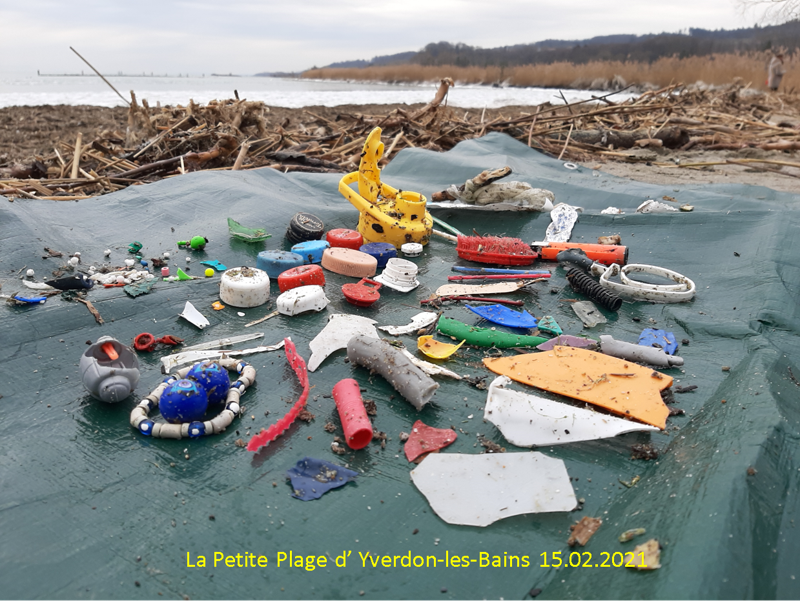

In [7]:
sut.display_image_ipython("resources/images/codegroups/petite_plage_yverdon_lesBains15_02_2021.png", thumb=(800,1200), rotate=0)

## Objekte gruppiert nach Nutzen 

Der Nutzen basiert auf der Nutzung des Objekts, bevor es weggeworfen wurde, oder auf der Artikelbeschreibung, wenn die ursprüngliche Nutzung unbestimmt ist. Identifizierte Objekte werden in einen der vordefinierten Kategoriecodes eingeordnet. Diese einzelnen Artikelcodes wurden gruppiert, um die Verwendung oder die Materialart für diesen Bericht bestmöglich zu beschreiben. Die Gruppierung der Codes ist eine breit angelegte Analysemethode, um die in den Wassersystemen gefundenen weggeworfenen Materialien nach Wirtschaftszweigen oder physikalischen Eigenschaften zu bewerten. Die Gegenstände werden in diesem Bericht auch unabhängig voneinander analysiert. Die Gruppierung wurde aus Feldbeobachtungen und Untersuchungen abgeleitet, um mögliche Quellen für verschiedene Schadstoffe zu ermitteln.

* __Abwasser:__ Gegenstände, die aus Kläranlagen freigesetzt werden, einschliesslich Gegenstände, die wahrscheinlich mit der Toilette gespült werden
* __Mikrokunststoffe:__ (< 5mm): zersplitterte Kunststoffe, geschäumte Kunststoffe und Kunststoffharze für die Vorproduktion  
* __Infrastruktur:__ Posten im Zusammenhang mit dem Bau und der Instandhaltung von Gebäuden, Strassen und der Wasser-/Stromversorgung 
* __Essen und Trinken:__ alle Materialien, die mit dem Konsum von Essen und Trinken zu tun haben 
* __Landwirtschaft:__ hauptsächlich industrielle Folien, z.B. Mulch und Reihenabdeckungen, Gewächshäuser, Bodenbegasung, Ballenverpackungen. Einschliesslich Hartkunststoffe für landwirtschaftliche Zäune, Blumentöpfe usw. 
* __Tabakwaren:__ hauptsächlich Zigarettenfilter, einschliesslich aller mit dem Rauchen verbundenen Materialien 
* __Erholung:__ Objekte, die mit Sport und Freizeit zu tun haben, z. B. Angeln, Jagen, Wandern usw. 
* __Verpackungen, die nicht für Lebensmittel und Getränke bestimmt sind:__ Verpackungsmaterial, das nicht als Lebensmittel, Getränke oder Tabakwaren gekennzeichnet ist
* __Kunststoffteile (> 5mm):__ zersplitterte Kunststoffe unbestimmter Herkunft oder Verwendung  
* __Persönliche Gegenstände:__ Accessoires, Hygieneartikel und Kleidung 
* __Nicht klassifiziert:__ nicht gruppierte Artikelcodes

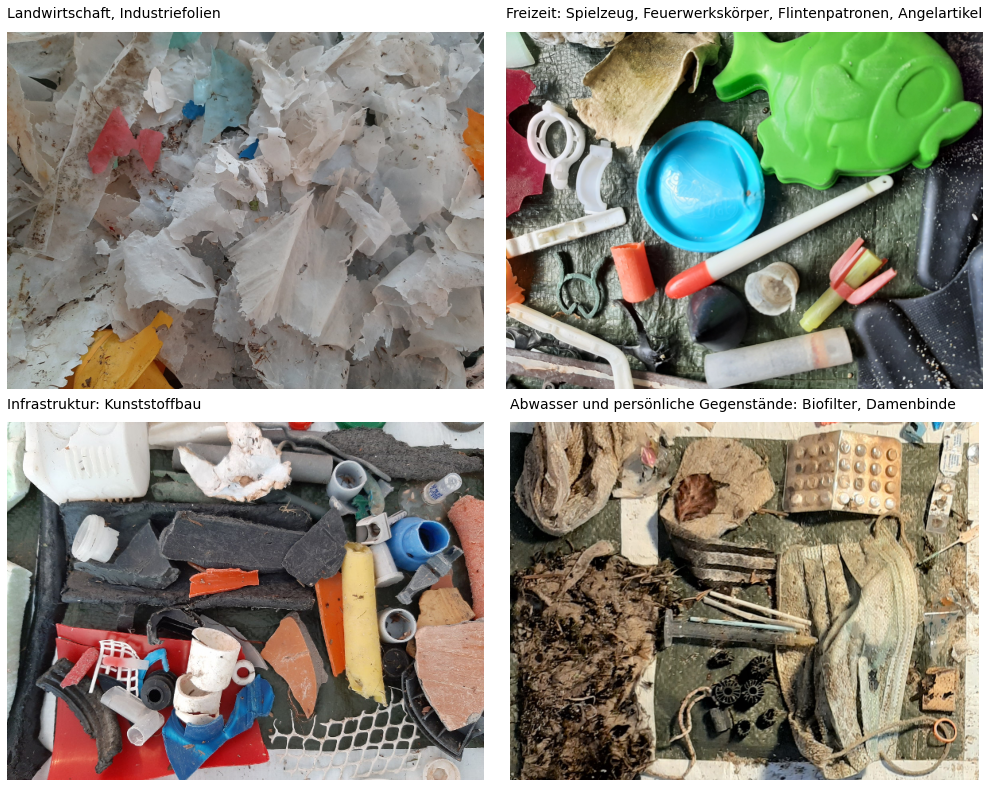

In [8]:
# read images
img_a = mpimg.imread("resources/images/codegroups/industrialsheeting_800_600.jpg")
img_b = mpimg.imread("resources/images/codegroups/20210419yverdon_rec.jpg")
img_c = mpimg.imread("resources/images/codegroups/infrastructure_450_600.jpg")
img_d = mpimg.imread("resources/images/codegroups/20201220_wt_pi_crop.jpg")

# display images
fig, ax = plt.subplots(2,2, figsize=(14,11))

axone=ax[0,0]
sut.hide_spines_ticks_grids(axone)
axone.imshow(img_a);
axone.set_title("Landwirtschaft, Industriefolien", **ck.title_k14)

axtwo=ax[0,1]
sut.hide_spines_ticks_grids(axtwo)
axtwo.imshow(img_b);
axtwo.set_title("Freizeit: Spielzeug, Feuerwerkskörper, Flintenpatronen, Angelartikel", **ck.title_k14)

axthree=ax[1,0]
sut.hide_spines_ticks_grids(axthree)
axthree.imshow(img_c);
axthree.set_title("Infrastruktur: Kunststoffbau", **ck.title_k14)

axfour=ax[1,1]
sut.hide_spines_ticks_grids(axfour)
axfour.set_title("Abwasser und persönliche Gegenstände: Biofilter, Damenbinde", **ck.title_k14)
axfour.imshow(img_d);

plt.tight_layout()
plt.show()

*__Oben:__ Objekte gruppiert nach Nutzen*

### Abwasserbehandlung 

Zu den Codes für die Abwasserbehandlung gehören Biomassehalter, die in Abfallbehandlungsprozessen verwendet werden, sowie wahrscheinliche Toilettenspülungen wie Wattestäbchen.  

:::{note}
G98 umfasst Windeln und Feuchttücher. Windeln werden in den Schweizer Wassersystemen nur selten gefunden, die Mengen sollten den Körperpflegetüchern zugeordnet werden. 
:::

In [9]:
# group definition
wastewater = [
    "G91",
    "G95",
    "G96",
    "G98",
    "G97",
    "G100",
    "G133",
    "G932",
    "G144"
]

wwcodes = dfCodes.loc[wastewater][cols_to_display]
wwcodes 

Objekte Gruppenname Material  \
code                                                                           
G91   Bio-Filtermaterial  / Trägermaterial aus Kunst...    Abwasser  Plastik   
G95                              Wattestäbchen / Tupfer    Abwasser  Plastik   
G96   Hygienebinden/Höscheneinlagen/Tampons und Appl...    Abwasser  Plastik   
G98                                    Windeln - Tücher    Abwasser  Plastik   
G97                   Behälter von Toilettenerfrischer     Abwasser  Plastik   
G100            Medizin; Behälter/Röhrchen/Verpackungen    Abwasser  Plastik   
G133                Kondome einschließlich Verpackungen    Abwasser    Gummi   
G932  Bio-Beads, Mikroplastik für die Abwasserbehand...    Abwasser  Plastik   
G144                                            Tampons    Abwasser    Stoff   

        pc  
code        
G91   none  
G95   none  
G96   none  
G98   none  
G97   none  
G100  none  
G133  none  
G932   G91  
G144  none

### Mikrokunststoffe 

Die Gruppe der Mikrokunststoffe umfasst alle Kunststoffe und geschäumten Kunststoffe mit einer Grösse von weniger als 5 mm aus der (MSFD)-Stammliste  {cite}`mlwguidance` der Positionen G103-G123. In unseren Daten sind nicht alle Codes identifiziert worden. Das Ziel dieses Projekts war die Quantifizierung der beobachtbaren Abfälle, die in der Regel grösser als 5 mm sind, aber die untere Grenze der natürlichen sichtbaren Erkennung bei der Vermessung einer Küstenlinie liegt bei etwa 2 - 5 mm. Im Laufe einer Untersuchung werden mit dem grösseren Material auch sichtbare Kleinstteile gesammelt, deren Zusammensetzung im Allgemeinen identifizierbar ist. Im Rahmen des IQAASL-Projekts wurden keine Methoden zur gezielten Erfassung von Objekten mit einer Grösse von weniger als 5 mm eingesetzt, aber alle sichtbaren Mikrokunststoffe, die während einer Untersuchung gesammelt wurden, wurden quantifiziert, gewogen und kategorisiert.

In [10]:
# define group
codesmicro=["G112", "G106", "G117", "G103", "G104", "G105", "G107", "G108", "G109", "G110", "G111", "G113", "G114", "G115", "G116", "G118", "G119", "G120", "G121", "G122", "G123"]

# make table
wwcodes = dfCodes.loc[codesmicro][cols_to_display]
wwcodes

Objekte           Gruppenname  \
code                                                                            
G112                         Industriepellets (Nurdles)  Mikroplastik (< 5mm)   
G106                     Kunststofffragmente eckig <5mm  Mikroplastik (< 5mm)   
G117                                     Styropor < 5mm  Mikroplastik (< 5mm)   
G103                      Kunststofffragmente rund <5mm  Mikroplastik (< 5mm)   
G104  Kunststofffragmente abgerundet / rundlich  <5m...  Mikroplastik (< 5mm)   
G105                Kunststofffragmente subangulär <5mm  Mikroplastik (< 5mm)   
G107                          Zylindrische Pellets <5mm  Mikroplastik (< 5mm)   
G108                       Scheibenförmige Pellets <5mm  Mikroplastik (< 5mm)   
G109                                Flache Pellets <5mm  Mikroplastik (< 5mm)   
G110                            Eiförmige Pellets < 5mm  Mikroplastik (< 5mm)   
G111                         Kugelförmige Pellets < 5mm  Mikroplastik (< 5mm)   
G113                                         Fäden <5mm  Mikroplastik (< 5mm)   
G114                                        Folien <5mm  Mikroplastik (< 5mm)   
G115                                   Schaumstoff <5mm  Mikroplastik (< 5mm)   
G116                                      Granulat <5mm  Mikroplastik (< 5mm)   
G118                 Kleine Industrielle Kügelchen <5mm  Mikroplastik (< 5mm)   
G119                    Folienartiger Kunststoff (>1mm)  Mikroplastik (< 5mm)   
G120                   Fadenförmiger Kunststoff ( >1mm)  Mikroplastik (< 5mm)   
G121                     Geschäumter Kunststoff ( >1mm)  Mikroplastik (< 5mm)   
G122                         Kunststofffragmente (>1mm)  Mikroplastik (< 5mm)   
G123                         Polyurethan-Granulat < 5mm  Mikroplastik (< 5mm)   

     Material    pc  
code                 
G112  Plastik  none  
G106  Plastik  none  
G117  Plastik  none  
G103  Plastik  none  
G104  Plastik  none  
G105  Plastik  none  
G107  Plastik  none  
G108  Plastik  none  
G109  Plastik  none  
G110  Plastik  none  
G111  Plastik  none  
G113  Plastik  none  
G114  Plastik  none  
G115  Plastik  none  
G116  Plastik  none  
G118  Plastik  none  
G119  Plastik  none  
G120  Plastik  none  
G121  Plastik  none  
G122  Plastik  none  
G123  Plastik  none

### Infrastruktur 

Infrastruktur bezieht sich auf alle Formen des Baus, der Renovierung und der Instandhaltung von öffentlichen und privaten Bauwerken, einschliesslich Strassen, Brücken und Häfen sowie der Strom- und Wasserversorgung. Entlang aller untersuchten Seen wurden bedeutende Mengen an Baukunststoffen und insbesondere an geschäumten Kunststoffen festgestellt. Siehe Erhebungsergebnisses 2020-2021 [Alle Erhebungen](allsurveysde)

Gängige Kunststoffe im Bauwesen sind Rohrstücke, Kabelschutzvorrichtungen, flexible und starre Schläuche sowie die dazugehörigen Verbindungsstücke, Armaturen und Abdeckungen. Kunststoffe, die bei der Betonherstellung verwendet werden, wie Dübel, Anker und Abstandshalter, wurden ebenfalls häufig identifiziert. Einige Artikel, die mit Kunststoffen im Bauwesen in Verbindung gebracht werden, haben eindeutige Codes wie G93: Kabelbinder oder G17: Behälter für Injektionspistolen. 

Andere Elemente in der Gruppe Infrastruktur haben einen allgemeineren Anwendungsfall: 

* G186 Industrieschrott 
* G194 Metallkabel 

####  Infrastruktur: geschäumter Kunststoff¶ 

Alle geschäumten Kunststoffe, die mit Isolieranwendungen in Verbindung gebracht werden, werden der Gruppe Infrastruktur zugeordnet. Extrudierte Schaumstoffe sind relativ dichte mehrfarbige Schaumstoffplatten und Sprühschäume, die grösser als 0,5 cm sind. Expandiertes Polystyrol wird aufgrund der häufigen Verwendung als Aussenisolierung für oberirdische Anwendungen als Infrastruktur eingestuft. Zusätzliche Codes wurden geschaffen, um Grössenvariationen von Schaumstoffen zu quantifizieren, G909 - G912. Die Änderungen in der Materialbeschreibung zielen darauf ab, Schaumstoffe zur Bauisolierung von Verpackungsschaumstoffen zu unterscheiden, obwohl beide für eine Vielzahl von Anwendungen verwendet werden. Die Materialänderungen an den geschäumten Kunststoffen werden für die Analyse unter dem übergeordneten Code zusammengefasst und separat erfasst. Ein detailliertes Verzeichnis der Art und Grösse der geschäumten Kunststoffe wird mit jedem Bericht geliefert. 

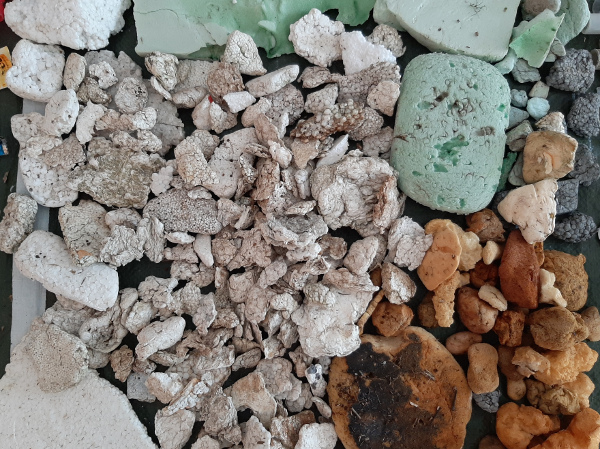

In [11]:
sut.display_image_ipython("resources/images/codegroups/fragfoam_450_600.jpg", thumb=(600, 1000), rotate=0)

*__Oben:__ Schaumstoffe in verschiedenen Grössen; XPS, EPS und Sprühschäume (SPF) entlang der Schweizer Uferlinien*

In [12]:
# define group
construction2= [
            "G9",
            "G204",
            "G187",
            "G919",
            "G65",
            "G17",
            "G22",
            "G66",
            "G68",
            "G69",
            "G72",
            "G74",
            "G81",
            "G82",
            "G83",
            "G87",
            "G89",
            "G93",
            "G160",
            "G162",
            "G166",
            "G169",
            "G174",
            "G186",
            "G188",
            "G189",
            "G190",
            "G194",
            "G197",
            "G198",
            "G199",
            "G214",
            "G908",
            "G909",
            "G910",
            "G911",
            "G912",
            "G921",
            "G927",
            "G931"
]

wwcodes = dfCodes.loc[construction2][cols_to_display]
wwcodes

Objekte     Gruppenname  \
code                                                                      
G9    Flaschen und Behälter für Reinigungsmittel und...   Infrastruktur   
G204                Baumaterial;  Ziegel, Rohre, Zement   Infrastruktur   
G187                                             Fässer   Infrastruktur   
G919                     Nägel, Schrauben, Bolzen usw.    Infrastruktur   
G65                                               Eimer  Landwirtschaft   
G17            Kartuschen von Kartuschen-spritzpistolen   Infrastruktur   
G22   Deckel für Chemikalien, Reinigungsmittel (Ohne...   Infrastruktur   
G66   Umreifungsbänder; Hartplastik für Verpackung f...   Infrastruktur   
G68                                 Fiberglas-Fragmente   Infrastruktur   
G69                              Helme oder Schutzhelme   Infrastruktur   
G72                                       Verkehrskegel   Infrastruktur   
G74      Schaumstoffverpackungen/Isolierung/Polyurethan   Infrastruktur   
G81    Schaumstoffstücke aus Polystyrol 0,5 cm - 2,5 cm   Infrastruktur   
G82         Schaumstoffstücke aus Polystyrol 2,5 - 50cm   Infrastruktur   
G83                               Styroporstücke > 50cm   Infrastruktur   
G87     Klebeband, Abdeckklebeband/Verpackungsklebeband   Infrastruktur   
G89                               Kunststoff-Bauabfälle   Infrastruktur   
G93                                         Kabelbinder   Infrastruktur   
G160                                           Paletten   Infrastruktur   
G162                                             Kisten   Infrastruktur   
G166                                         Farbpinsel   Infrastruktur   
G169                                   Balken, Stauholz   Infrastruktur   
G174                                  Aerosolspraydosen   Infrastruktur   
G186                                   Industrieschrott   Infrastruktur   
G188                     Andere Kanister/Behälter < 4 L   Infrastruktur   
G189                Gasflaschen, Fässer und Eimer > 4 L   Infrastruktur   
G190              Farbtöpfe, Farbbüchsen,  ( Farbeimer)   Infrastruktur   
G194  Kabel, Metalldraht oft in Gummi- oder Kunststo...   Infrastruktur   
G197                                   sonstiges Metall   Infrastruktur   
G198                         Andere Metallteile < 50 cm   Infrastruktur   
G199                         Andere Metallteile > 50 cm   Infrastruktur   
G214                                            Öl/Teer   Infrastruktur   
G908                  Klebeband; elektrisch, isolierend   Infrastruktur   
G909  Schaumstoffisolierung, Spray und Schaumstoffpl...   Infrastruktur   
G910  Schaumstoffisolierung, Sprüh- und Schaumstoffp...   Infrastruktur   
G911  Schaumstoffstücke aus expandiertem Polystyrol ...   Infrastruktur   
G912  Schaumstoffstücke aus expandiertem Polystyrol ...   Infrastruktur   
G921                     Keramikfliesen und Bruchstücke   Infrastruktur   
G927  Plastikschnur von Rasentrimmern, die zum Schne...   Infrastruktur   
G931  (Absperr)band für Absperrungen, Polizei, Baust...   Infrastruktur   

         Material    pc  
code                     
G9        Plastik  none  
G204         Glas  none  
G187       Metall  none  
G919       Metall  G197  
G65       Plastik  none  
G17       Plastik  none  
G22       Plastik  none  
G66       Plastik  none  
G68       Plastik  none  
G69       Plastik  none  
G72       Plastik  none  
G74       Plastik  none  
G81       Plastik  none  
G82       Plastik  none  
G83       Plastik  none  
G87       Plastik  none  
G89       Plastik  none  
G93       Plastik  none  
G160         Holz  none  
G162         Holz  none  
G166         Holz  none  
G169         Holz  none  
G174       Metall  none  
G186       Metall  none  
G188       Metall  none  
G189       Metall  none  
G190       Metall  none  
G194       Metall  none  
G197       Metall  none  
G198       Metall  none  
G199       Metall  none  
G214  Chemikalien  none  
G908      Pla

### Essen und Trinken

Beinhaltet alle Materialien, die mit Essen und Trinken in Verbindung stehen. Die grössten Mengen an Einwegkunststoffen (SUP) werden im Zusammenhang mit dem Verzehr im Freien oder zum Mitnehmen verwendet. Verpackungen für Süssigkeiten und Snacks (G30) und Glasscherben (G200) sind an den Schweizer Küsten am häufigsten anzutreffen. Siehe Erhebungsergebnisses 2020-2021 [Alle Erhebungen](allsurveysde)

In [13]:
foodstuff = [
    "G1",
    "G8",
    "G7",
    "G10",
    "G21",
    "G24",
    "G30",
    "G151",
    "G175",
    "G176",
    "G177",
    "G178",
    "G179",
    "G181",
    "G200",
    "G201",
    "G203",
    "G150",
    "G153",
    "G159",
    "G165",
    "G31",
    "G33",
    "G34",
    "G35",
    "G906",
    "G907",
    "G926",
    "G938"
    ]

wwcodes = dfCodes.loc[foodstuff][cols_to_display]
wwcodes

Objekte        Gruppenname  \
code                                                                         
G1                                        Sixpack-Ringe  Essen und Trinken   
G8                              Getränkeflaschen > 0,5L  Essen und Trinken   
G7                           Getränkeflaschen < = 0,5 l  Essen und Trinken   
G10   Einwegbehälter für Lebensmittel aus Schaumstof...  Essen und Trinken   
G21                 Getränke-Deckel, Getränkeverschluss  Essen und Trinken   
G24                 Ringe von Plastikflaschen/Behältern  Essen und Trinken   
G30      Lebensmittelverpackungen; Süssigkeiten, Snacks  Essen und Trinken   
G151                                 Tetrapack, Kartons  Essen und Trinken   
G175                    Getränkedosen (Dosen, Getränke)  Essen und Trinken   
G176                 Konservendosen (Lebensmitteldosen)  Essen und Trinken   
G177                    Verpackungen aus Aluminiumfolie  Essen und Trinken   
G178  Kronkorken, Lasche von Dose/Aufreisslaschen vo...  Essen und Trinken   
G179                                       Einweg Grill  Essen und Trinken   
G181          Geschirr aus Metall, Tassen, Besteck usw.  Essen und Trinken   
G200                       Getränke Glasflasche, Stücke  Essen und Trinken   
G201                     Gläser, einschliesslich Stücke  Essen und Trinken   
G203  Geschirr aus Keramik oder Glas, Tassen, Teller...  Essen und Trinken   
G150                            Milchkartons, Tetrapack  Essen und Trinken   
G153  Papierbecher, Lebensmittelverpackungen aus Pap...  Essen und Trinken   
G159                                               Kork  Essen und Trinken   
G165  Glacestengel (Eisstiele), Zahnstocher, Essstäb...  Essen und Trinken   
G31   Schleckstengel, Stengel von Lutscher, Lollypop...  Essen und Trinken   
G33   Einwegartikel; Tassen/Becher & Deckel, Schaums...  Essen und Trinken   
G34                        Besteck, Teller und Tabletts  Essen und Trinken   
G35                         Strohhalme und Rührstäbchen  Essen und Trinken   
G906                            Kaffeekapseln Aluminium  Essen und Trinken   
G907                       Kaffeekapseln aus Kunststoff  Essen und Trinken   
G926                  Kaugummi, enthält oft Kunststoffe  Essen und Trinken   
G938                  Zahnstocher, Zahnseide Kunststoff  Essen und Trinken   

     Material    pc  
code                 
G1    Plastik  none  
G8    Plastik  none  
G7    Plastik  none  
G10   Plastik  none  
G21   Plastik  none  
G24   Plastik  none  
G30   Plastik  none  
G151   Papier  none  
G175   Metall  none  
G176   Metall  none  
G177   Metall  none  
G178   Metall  none  
G179   Metall  none  
G181   Metall  none  
G200     Glas  none  
G201     Glas  none  
G203     Glas  none  
G150   Papier  none  
G153   Papier  none  
G159     Holz  none  
G165     Holz  none  
G31   Plastik  none  
G33   Plastik  none  
G34   Plastik  none  
G35   Plastik  none  
G906   Metall  G177  
G907  Plastik  G124  
G926  Plastik  G124  
G938  Plastik  G124

### Landwirtschaft

Mehrere Codes wurden hinzugefügt, um Artikel zu kennzeichnen, die mit der Landwirtschaft in Verbindung stehen, wie z.B. G937: Pheromonköder aus Kunststoff, die üblicherweise in Weinbergen verwendet werden, und G943: Kunststoffzäune für die saisonale Viehweide. Der spezifische Foliencode G936: Gewächshausfolien und Silofolien wurde für eine besondere Art von Produkten hinzugefügt, bei denen die landwirtschaftliche Verwendung erkennbar ist. 

Industriefolien (G67) ist eine weit gefasste Kategorie, die Kunststoffplatten und -folien umfasst, bei denen es sich um flache Kunststoffteile handelt, die zur Verwendung in bestimmten Anwendungen auf eine bestimmte Dicke gebracht werden. Die Produkte unterscheiden sich in Bezug auf Materialien, Eigenschaften und Abmessungen [ogsapfpss]. Es ist schwierig, die Verwendung von Kunststofffolien in der Landwirtschaft einzugrenzen, da die gleichen Kunststoffe auch in der Verpackungs- und Baubranche in grossem Umfang verwendet werden. Vor allem an den Schweizer Küsten sind die Kunststofffolien extrem verwittert und zersplittert, so dass eine eindeutige Verwendung und Herkunft schwer zu bestimmen ist. 

Industriefolien werden der Landwirtschaft zugeschrieben, da sie über einen längeren Zeitraum physikalischen Einflüssen ausgesetzt sind und in unmittelbarer Nähe von Flüssen, Bächen und Kanälen verwendet werden. Industriefolien werden auch der Landwirtschaft zugerechnet, da Kunststoffmaterialien zunehmend in landwirtschaftlichen Anwendungen eingesetzt werden, die gemeinhin als Plastikkulturen bezeichnet werden. Die Plastikkultur umfasst Bewässerungsschläuche, Kunststofftöpfe für Baumschulen und eine umfangreiche Verwendung von Folien für den Gartenbau, den Getreideanbau und die Milchwirtschaft {cite}`plasticulture`.

Folien und Filme aus Plastikkulturen G67: 

* Mulchfolie 
* Zeilenabdeckungen 
* Polytunnels 
* Kunststoff-Gewächshäuser 
* Filme zur Bodenbegasung 
* Silageballen-Verpackung

In [14]:
ag2 = [
    "G36",
    "G936",
    "G937",
    "G13",
    "G18", 
    "G41",
    "G65",
    "G67",
    "G90",
    "G140",
    "G161",
    "G168",
    "G170",
    "G171",
    "G172",
    "G191",
    "G192",
    "G934",
    "G943"
]

wwcodes = dfCodes.loc[ag2][cols_to_display]
wwcodes 

Objekte     Gruppenname  \
code                                                                      
G36   Säcke aus strapazierfähigem Kunststoff für 25 ...  Landwirtschaft   
G936                           Folien für Gewächshäuser  Landwirtschaft   
G937                        Pheromonköder für Weinberge  Landwirtschaft   
G13   Flaschen, Behälter, Fässer zum Transportieren ...  Landwirtschaft   
G18                                        Kisten/Körbe  Landwirtschaft   
G41                Handschuhe Industriell/Professionell  Landwirtschaft   
G65                                               Eimer  Landwirtschaft   
G67                         Industriefolie (Kunststoff)  Landwirtschaft   
G90                             Blumentöpfe aus Plastik  Landwirtschaft   
G140     Sack oder Beutel (Tragetasche), Jute oder Hanf  Landwirtschaft   
G161                                 Verarbeitetes Holz  Landwirtschaft   
G168                                        Holzbretter  Landwirtschaft   
G170                                 Holz (verarbeitet)  Landwirtschaft   
G171                              Sonstiges Holz < 50cm  Landwirtschaft   
G172                             Sonstiges Holz > 50 cm  Landwirtschaft   
G191                                   Draht und Gitter  Landwirtschaft   
G192                                             Fässer  Landwirtschaft   
G934  Sandsäcke, Kunststoff für Hochwasser- und Eros...  Landwirtschaft   
G943                   Zäune Landwirtschaft, Kunststoff  Landwirtschaft   

     Material    pc  
code                 
G36   Plastik  none  
G936  Plastik   G67  
G937  Plastik  G124  
G13   Plastik  none  
G18   Plastik  none  
G41   Plastik  none  
G65   Plastik  none  
G67   Plastik  none  
G90   Plastik  none  
G140    Stoff  none  
G161     Holz  none  
G168     Holz  none  
G170     Holz  none  
G171     Holz  none  
G172     Holz  none  
G191   Metall  none  
G192   Metall  none  
G934  Plastik  G124  
G943  Plastik  G124

### Tabakwaren

Alle tabakbezogenen Artikel. 

In [15]:
tobac = [
    "G25",
    "G26",
    "G27",
    "G152"
    ]

wwcodes = dfCodes.loc[tobac][cols_to_display]
wwcodes

Objekte Gruppenname Material  \
code                                                                           
G25             Tabak; Kunststoffverpackungen, Behälter  Tabakwaren  Plastik   
G26                                           Feuerzeug  Tabakwaren  Plastik   
G27                                    Zigarettenfilter  Tabakwaren  Plastik   
G152  Papier &Karton;Zigarettenschachteln, Papier/Ka...  Tabakwaren   Papier   

        pc  
code        
G25   none  
G26   none  
G27   none  
G152  none

### Codes für die Freizeitgestaltung

Die Freizeitgruppe umfasst Objekte, die mit Sport und Freizeit zu tun haben, d.h. Angeln, Jagen, Wandern, Bootfahren und Strandaktivitäten, Lebensmittel, Getränke und Tabak sind ausgeschlossen. Schrotpatronen aus Plastik (G70) wurden in überraschend grossen Mengen gefunden, wenn man bedenkt, dass die Jagd in der Nähe der grossen Seen nicht erlaubt ist. Dies könnte ein wichtiger Indikator für die zurückgelegten Entfernungen in den Gewässern sein.

In [16]:
recreation = [
    "G32",
    "G43",
    "G48",
    "G49",
    "G50",
    "G49",
    "G51",
    "G52",
    "G53",
    "G54",
    "G53",
    "G55",
    "G56",
    "G57",
    "G58",
    "G59",
    "G60",
    "G61",
    "G63",
    "G70",
    "G73",
    "G86",
    "G92",
    "G94",
    "G206",
    "G132",
    "G142",
    "G143",
    "G155",
    "G164",
    "G167",
    "G182",
    "G183",
    "G125",
    "G126",
    "G11",
    "G213",
    "G904",
    "G940"
  ]

wwcodes = dfCodes.loc[recreation][cols_to_display]
wwcodes

Objekte  \
code                                                      
G32                          Spielzeug und Partyartikel   
G43   Sicherheitsetiketten, Siegel für Fischerei ode...   
G48                                 Seile, synthetische   
G49                                         Seile > 1cm   
G50                                        Schnur < 1cm   
G49                                         Seile > 1cm   
G51                                         Fischernetz   
G52                                Netze und Teilstücke   
G53                         Netze und Teilstücke < 50cm   
G54                         Netze und Teilstücke > 50cm   
G53                         Netze und Teilstücke < 50cm   
G55                            Angelschnur (verwickelt)   
G56                                   Verhedderte Netze   
G57                                         Fischkisten   
G58                              Schaumstoff-Fischkiste   
G59                       Monofile Angelschnur (Angeln)   
G60                  Lichtstab, Knicklicht, Glow-sticks   
G61                              Sonstiges Angelzubehör   
G63                                               Bojen   
G70                               Schrotflintenpatronen   
G73   Gegenstände aus Schaumstoff & Teilstücke (nich...   
G86                                      Scuba material   
G92                                       Köderbehälter   
G94                                           Tischtuch   
G206                                           Glasboje   
G132                                 Schwimmer (Angeln)   
G142                            Seil, Schnur oder Netze   
G143                                Segel und Segeltuch   
G155              Feuerwerkspapierhülsen und -fragmente   
G164                                        Fischkisten   
G167                      Streichhölzer oder Feuerwerke   
G182     Angeln; Haken, Gewichte, Köder, Senkblei, usw.   
G183                               Teile von Angelhaken   
G125                 Luftballons und Luftballonstäbchen   
G126                                              Bälle   
G11          Kosmetika für den Strand, z.B. Sonnencreme   
G213                                     Paraffinwachs    
G904  Feuerwerkskörper; Raketenkappen, explodierte T...   
G940  Schaumstoff EVA (flexibler Kunststoff) für Han...   

                Gruppenname     Material    pc  
code                                            
G32   Freizeit und Erholung      Plastik  none  
G43   Freizeit und Erholung      Plastik  none  
G48   Freizeit und Erholung      Plastik  none  
G49   Freizeit und Erholung      Plastik  none  
G50   Freizeit und Erholung      Plastik  none  
G49   Freizeit und Erholung      Plastik  none  
G51   Freizeit und Erholung      Plastik  none  
G52   Freizeit und Erholung      Plastik  none  
G53   Freizeit und Erholung      Plastik  none  
G54   Freizeit und Erholung      Plastik  none  
G53   Freizeit und Erholung      Plastik  none  
G55   Freizeit und Erholung      Plastik  none  
G56   Freizeit und Erholung      Plastik  none  
G57   Freizeit und Erholung      Plastik  none  
G58   Freizeit und Erholung      Plastik  none  
G59   Freizeit und Erholung      Plastik  none  
G60   Freizeit und Erholung      Plastik  none  
G61   Freizeit und Erholung      Plastik  none  
G63   Freizeit und Erholung      Plastik  none  
G70   Freizeit und Erholung      Plastik  none  
G73   Freizeit und Erholung      Plastik  none  
G86   Freizeit und Erholung      Plastik  none  
G92   Freizeit und Erholung      Plastik  none  
G94   Freizeit und Erholung      Plastik  none  
G206  Freizeit und Erholung         Glas  none  
G132  Freizeit und Erholung        Gummi  none  
G142  Freizeit und Erholung        Stoff  none  
G143  Freizeit und Erholung        Stoff  none  
G155  Freizeit und Erholung       Papier  none  
G164  Freizeit und Erholung         Holz  none  
G167  Freizeit und Erholung         Holz  none  
G182  Freiz

### Verpackungen, die sich nicht auf Lebensmittel, Getränke, Tabak oder unbekannte Herkunft beziehen.

Sämtliches Verpackungs- oder Umhüllungsmaterial, das nicht als Lebensmittel-, Getränke- oder Tabakverpackung gekennzeichnet ist. Die Gruppe der Verpackungen, die nicht zu Lebensmitteln/Getränken gehören, enthält (G941) einen Code, der hinzugefügt wurde, um dünne Verpackungsfolien von dickeren Industriefolien zu unterscheiden. Die Folien sind in der Regel stark beschädigt und zersplittert, so dass der ursprüngliche Verwendungszweck und die Herkunft schwer zu bestimmen sind. 

*Verpackungen, die weder mit Tabak noch mit Lebensmitteln und Getränken in Verbindung stehen oder deren Herkunft unbekannt ist:*

In [17]:
packaging = [
    "G23",
    "G2",
    "G146",
    "G148",
    "G149", 
    "G3", 
    "G20",
    "G4",
    "G6",
    "G147",
    "G922",
    "G941",
    "G156",
    "G157",
    "G158",
    "G925",
    "G5"
    ]

wwcodes = dfCodes.loc[packaging][cols_to_display]
wwcodes.loc["G925", "description"] = "Dessicants/moisture absorbers"
wwcodes

Objekte  \
code                                                      
G23                             unidentifizierte Deckel   
G2                                       Säcke, Taschen   
G146                                     Papier, Karton   
G148                            Kartonkisten und Stücke   
G149                                 Papierverpackungen   
G3    Taschen; Einkaufstaschen, Shoppingtaschen, Leb...   
G20                                  Laschen und Deckel   
G4    Kleine Plastikbeutel; Gefrierbeutel, Zippsäckc...   
G6    Flaschen und Behälter aus Kunststoff, nicht fü...   
G147                  Papiertragetaschen, (Papiertüten)   
G922                             Etiketten, Strichcodes   
G941  Verpackungsfolien, nicht für Lebensmittel oder...   
G156                                    Papierfragmente   
G157                                             Papier   
G158                    Sonstige Gegenstände aus Papier   
G925  Pakete: Trockenmittel/Feuchtigkeitsabsorber, m...   
G5                           Plastiksäcke/ Plastiktüten   

                         Gruppenname Material    pc  \
code                                                  
G23   Nicht-Lebensmittelverpackungen  Plastik  none   
G2    Nicht-Lebensmittelverpackungen  Plastik  none   
G146  Nicht-Lebensmittelverpackungen   Papier  none   
G148  Nicht-Lebensmittelverpackungen   Papier  none   
G149  Nicht-Lebensmittelverpackungen   Papier  none   
G3    Nicht-Lebensmittelverpackungen  Plastik  none   
G20   Nicht-Lebensmittelverpackungen  Plastik  none   
G4    Nicht-Lebensmittelverpackungen  Plastik  none   
G6    Nicht-Lebensmittelverpackungen  Plastik  none   
G147  Nicht-Lebensmittelverpackungen   Papier  none   
G922  Nicht-Lebensmittelverpackungen  Plastik  G124   
G941  Nicht-Lebensmittelverpackungen  Plastik  G124   
G156  Nicht-Lebensmittelverpackungen   Papier  none   
G157  Nicht-Lebensmittelverpackungen   Papier  none   
G158  Nicht-Lebensmittelverpackungen   Papier  none   
G925  Nicht-Lebensmittelverpackungen  Plastik  G124   
G5    Nicht-Lebensmittelverpackungen  Plastik  none   

                        description  
code                                 
G23                             NaN  
G2                              NaN  
G146                            NaN  
G148                            NaN  
G149                            NaN  
G3                              NaN  
G20                             NaN  
G4                              NaN  
G6                              NaN  
G147                            NaN  
G922                            NaN  
G941                            NaN  
G156                            NaN  
G157                            NaN  
G158                            NaN  
G925  Dessicants/moisture absorbers  
G5                              NaN

### Fragmentierte Kunststoffe: Gfrags¶ 

Die Gruppe der Kunststofffragmente (Gfrags für die Analyse) sind alle Kunststoff- und Schaumstoff-/Kunststoffverbundstücke, die grösser als 0,5 cm sind. Bei den Kunststofffragmenten, die an den Schweizer Küsten gefunden wurden, handelt es sich überwiegend um kleine, harte, stark fragmentierte Stücke eines pigmentierten Gegenstands. Der ursprüngliche Verwendungszweck und die Herkunft sind im Prinzip unbestimmt. Die einzelnen Plastikteile wurden nach Material und Grösse quantifiziert: 

In [18]:
plasticpcs = [
    "G78",
    "G79",
    "G80",
    "G75", 
    "G76", 
    "G77" 
    ]

wwcodes = dfCodes.loc[plasticpcs][cols_to_display]
wwcodes

Objekte       Gruppenname Material  \
code                                                                           
G78                Kunststoffstücke 0,5cm - 2,5cm  Plastikfragmente  Plastik   
G79               Kunststoffstücke 2,5 cm - 50 cm  Plastikfragmente  Plastik   
G80                        Kunststoffteile > 50cm  Plastikfragmente  Plastik   
G75      Kunststoff-/Polystyrolteile 0,5 - 2,5 cm  Plastikfragmente  Plastik   
G76   Kunststoff/Polystyrolschaumstoff 2,5 > < 50  Plastikfragmente  Plastik   
G77               Kunststoff oder Styropor > 50cm  Plastikfragmente  Plastik   

        pc  
code        
G78   none  
G79   none  
G80   none  
G75   none  
G76   none  
G77   none

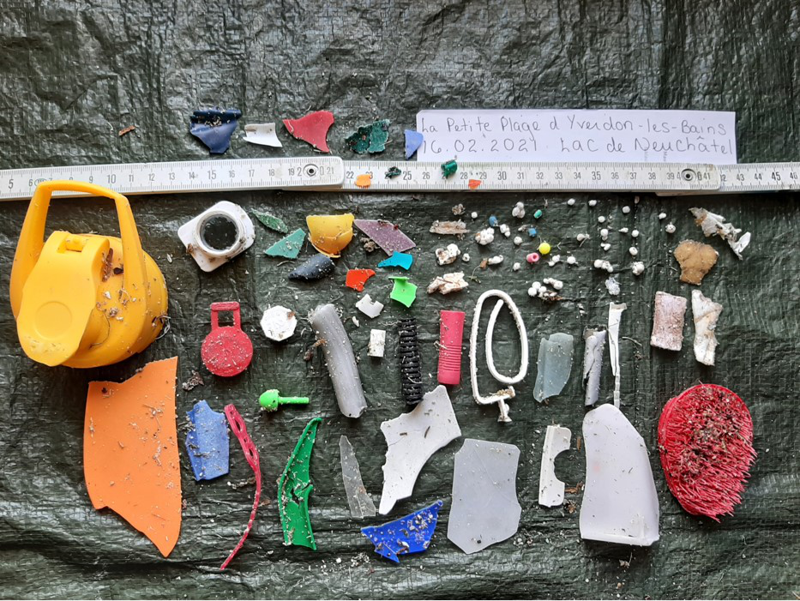

In [19]:
sut.display_image_ipython("resources/images/codegroups/Yverdon_lesBainsLacNeuchâtel15_02_2021.jpg", thumb=(800, 1200), rotate=0)

*__Oben:__ Verschiedene Grössen von Plastikteilen*

### Persönliche Gegenstände¶ 

Persönliches Material für Hygiene, Kleidung und Zubehör, das verloren oder weggeworfen wurde. Dazu gehören auch pandemiebezogene Artikel wie Gesichtsmasken.

In [20]:
pi = [
    "G211",
    "G84",
    "G99",
    "G101",
    "G102",
    "G127",
    "G131",
    "G135",
    "G136",
    "G137",
    "G138",
    "G139",
    "G37",
    "G39",
    "G40",
    "G145",
    "G28",
    "G29",
    "G154",
    "G195",
    "G900",
    "G901",
    "G902",
    "G903",
    "G905",
    "G913",
    "G914",
    "G915",
    "G918",
    "G916",
    "G933",
    "G929",
    "G939",
    "G945",
    "G923",
    "G928",
    "G12",
    "G71",
    "G88",
    "G935",
    "G930"
    ]
wwcodes = dfCodes.loc[pi][cols_to_display]
wwcodes

Objekte  \
code                                                      
G211  Sonstiges medizinisches Material (Tupfer, Verb...   
G84                                    CD oder CD-Hülle   
G99                                   Spritzen - Nadeln   
G101  Robidog Hundekot-Säcklein, andere Hundekotsäck...   
G102                                         Flip-Flops   
G127                                       Gummistiefel   
G131                                        Gummibänder   
G135  Kleidung, Fussbekleidung, Kopfbedeckung, Hands...   
G136                                             Schuhe   
G137                    Kleidung, Handtücher und Lappen   
G138                                Schuhe und Sandalen   
G139                                          Rucksäcke   
G37                   Netzbeutel, Netztasche, Netzsäcke   
G39                                          Handschuhe   
G40                          Handschuhe Haushalt/Garten   
G145                                   Andere Textilien   
G28                Stifte, Deckel, Druckbleistifte usw.   
G29                    Kämme, Bürsten und Sonnenbrillen   
G154                       Zeitungen oder Zeitschriften   
G195                               Batterien (Haushalt)   
G900     Handschuhe Latex, persönliche Schutzausrüstung   
G901                  Medizinische Masken, synthetische   
G902                         Medizinische Masken, Stoff   
G903  Behälter und Packungen für Handdesinfektionsmi...   
G905  Haarspangen, Haargummis, persönliche Accessoir...   
G913                                          Schnuller   
G914  Büroklammern, Wäscheklammern, Gebrauchsgegenst...   
G915      Reflektoren, Mobilitätsartikel aus Kunststoff   
G918  Sicherheitsnadeln, Büroklammern, kleine Gebrau...   
G916                         Bleistifte und Bruchstücke   
G933  Taschen, Etuis für Zubehör, Brillen, Elektroni...   
G929     Elektronik und Teile; Sensoren, Headsets usw.    
G939               Kunststoffblumen, Kunststoffpflanzen   
G945                                      Rasierklingen   
G923  Taschentücher, Toilettenpapier, Servietten, Pa...   
G928                               Bänder und Schleifen   
G12   Kosmetika, Behälter für Körperpflegeprodukte, ...   
G71                                     Schuhe Sandalen   
G88                                 Telefon inkl. Teile   
G935  Gummi-Puffer für Geh- und Wanderstöcke und Tei...   
G930                             Schaumstoff-Ohrstöpsel   

                  Gruppenname Material    pc  
code                                          
G211  Persönliche Gegenstände  Plastik  none  
G84   Persönliche Gegenstände  Plastik  none  
G99   Persönliche Gegenstände  Plastik  none  
G101  Persönliche Gegenstände  Plastik  none  
G102  Persönliche Gegenstände  Plastik  none  
G127  Persönliche Gegenstände    Gummi  none  
G131  Persönliche Gegenstände    Gummi  none  
G135  Persönliche Gegenstände    Stoff  none  
G136  Persönliche Gegenstände    Stoff  none  
G137  Persönliche Gegenstände    Stoff  none  
G138  Persönliche Gegenstände    Stoff  none  
G139  Persönliche Gegenstände    Stoff  none  
G37   Persönliche Gegenstände  Plastik  none  
G39   Persönliche Gegenstände  Plastik  none  
G40   Persönliche Gegenstände  Plastik  none  
G145  Persönliche Gegenstände    Stoff  none  
G28   Persönliche Gegenstände  Plastik  none  
G29   Persönliche Gegenstände  Plastik  none  
G154  Persönliche Gegenstände   Papier  none  
G195  Persönliche Gegenstände   Metall  none  
G900  Persönliche Gegenstände    Gummi  G134  
G901  Persönliche Gegenstände  Plastik  G124  
G902  Persönliche Gegenstände    Stoff  G145  
G903  Persönliche Gegenstände  Plastik   G12  
G905  Persönliche Gegenstände  Plastik  G124  
G913  Persönliche Gegenstände  Plastik  G124  
G914  Persönliche Gegenstände  Plastik  G124  
G915  Persönliche Gegenstände  Plastik  G124  
G918  Persönliche Gegenstände   Metall  G198  
G916  Persönliche Gegenstände     Holz  G170  
G933  

### Nicht klassifizierte Posten¶ 

Bei den nicht gruppierten Codes handelt es sich überwiegend um Elemente, deren Ursprung unklar ist, die selten identifiziert werden oder die sich nicht auf die Überwachung der Schweizer Wassersysteme an der Küste beziehen. Viele der Elemente haben einen Gesamtwert von 0 für alle in diesem Bericht enthaltenen Erhebungsdaten. 

Bemerkenswerte Ausnahmen sind G208 Glas- oder Keramikfragmente >2,5cm. Bei G208 handelt es sich überwiegend um Keramikstücke unbekannter Verwendung oder Herkunft, die häufig und in relativ hohen Konzentrationen gefunden werden. Das Vorkommen von Keramikfragmenten kann mit den Quellen des Materials für die Strandauffüllungspraktiken sowie mit natürlichen Transport- und Ablagerungsprozessen zusammenhängen. Identifizierbare Glasflaschen und -stücke werden als (G200) klassifiziert und mit Lebensmitteln und Getränken gruppiert. 

In [21]:
wwcodes = dfCodes[dfCodes.Gruppenname== "nicht klassifiziert"][cols_to_display]
wwcodes 

Objekte          Gruppenname  \
code                                                                           
G212  Ölknollen oder Kohlefragmente - nicht von eine...  nicht klassifiziert   
G141                                           Teppiche  nicht klassifiziert   
G202                                         Glühbirnen  nicht klassifiziert   
G205                                  Leuchtstoffröhren  nicht klassifiziert   
G207                     Tonkrüge zum Fangen von Kraken  nicht klassifiziert   
G208                 Glas oder Keramikfragmente >2.5 cm  nicht klassifiziert   
G209                        Grosse Gegenstände aus Glas  nicht klassifiziert   
G210                 Sonstiges Glas/Keramik Materialien  nicht klassifiziert   
G917                                            Blähton  nicht klassifiziert   
G180                                    Haushaltsgeräte  nicht klassifiziert   
G184                                    Hummerfangkörbe  nicht klassifiziert   
G185                          Behälter mittlerer Grösse  nicht klassifiziert   
G193                  Teile von Autos und Autobatterien  nicht klassifiziert   
G196                     Grosse metallische Gegenstände  nicht klassifiziert   
G124        Andere Kunststoff- oder Schaumstoffprodukte  nicht klassifiziert   
G14              Flaschen für Motoröl (Motorölflaschen)  nicht klassifiziert   
G15        Flaschen für Motoröl, Motorölflaschen > 50cm  nicht klassifiziert   
G16                                            Kanister  nicht klassifiziert   
G19                                           Autoteile  nicht klassifiziert   
G38   Abdeckungen; Kunststoffverpackungen, Folien zu...  nicht klassifiziert   
G42                            Krabben- und Hummerkörbe  nicht klassifiziert   
G44              Kunststoffgefäss zum Fangen von Kraken  nicht klassifiziert   
G45                                        Muschelnetze  nicht klassifiziert   
G46                                      Austernschalen  nicht klassifiziert   
G47                         Folien aus der Muschelzucht  nicht klassifiziert   
G62                                 Schwimmer für Netze  nicht klassifiziert   
G64                                           Kotflügel  nicht klassifiziert   
G700                 Die Ergebnisse einer Aufräumaktion  nicht klassifiziert   
G85                 Salzsäcke (gross, zum Salzstreuen)   nicht klassifiziert   
G942    Kunststoffspäne von Drehbänken, CNC-Bearbeitung  nicht klassifiziert   
G944            Pelletmasse aus dem Spritzgussverfahren  nicht klassifiziert   
G128                          Reifen und Antriebsriemen  nicht klassifiziert   
G129                         Schläuche und Gummiplatten  nicht klassifiziert   
G130                                              Räder  nicht klassifiziert   
G134                                    Sonstiges Gummi  nicht klassifiziert   
G998                       Keine freiliegende Uferlinie  nicht klassifiziert   
G999  Keine Gegenstände bei dieser Erhebung/Studie g...  nicht klassifiziert   
G163                           Krabben- und Hummerkörbe  nicht klassifiziert   
G173                                          Sonstiges  nicht klassifiziert   

         Material    pc  
code                     
G212  Chemikalien  none  
G141        Stoff  none  
G202         Glas  none  
G205         Glas  none  
G207         Glas  none  
G208         Glas  none  
G209         Glas  none  
G210         Glas  none  
G917         Glas  G210  
G180       Metall  none  
G184       Metall  none  
G185       Metall  none  
G193       Metall  none  
G196       Metall  none  
G124      Plastik  none  
G14       Plastik  none  
G15       Plastik  none  
G16       Plastik  none  
G19       Plastik  none  
G38       Plastik  none  
G42       Plastik  none  
G44       Plastik  none  
G45       Plastik  none  
G46       Plastik  none  
G47       Plastik  none  
G62       Plastik  none  
G64       Plastik  none  
G700      Pla

## Liste der Zusatzcodes

Codes für Schweizer Wassersysteme hinzugefügt 

In [22]:
addcodes = [
    "G900", 
    "G901", 
    "G902", 
    "G903", 
    "G904", 
    "G905",
    "G906", 
    "G907", 
    "G908", 
    "G909", 
    "G910", 
    "G911", 
    "G912", 
    "G913", 
    "G914", 
    "G915", 
    "G916", 
    "G917", 
    "G918", 
    "G919", 
    "G920", 
    "G921", 
    "G922", 
    "G923", 
    "G925", 
    "G926", 
    "G927", 
    "G928", 
    "G929", 
    "G930",
    "G931",
    "G932",
    "G933",
    "G934",
    "G935",
    "G936",
    "G937",
    "G938",
    "G939",
    "G940",
    "G941",
    "G942",
    "G943",
    "G944",
    "G945"
]

wwcodes = dfCodes[dfCodes.index.isin(addcodes)][cols_to_display]
wwcodes

Objekte  \
code                                                      
G902                         Medizinische Masken, Stoff   
G917                                            Blähton   
G921                     Keramikfliesen und Bruchstücke   
G906                            Kaffeekapseln Aluminium   
G918  Sicherheitsnadeln, Büroklammern, kleine Gebrau...   
G919                     Nägel, Schrauben, Bolzen usw.    
G929     Elektronik und Teile; Sensoren, Headsets usw.    
G945                                      Rasierklingen   
G923  Taschentücher, Toilettenpapier, Servietten, Pa...   
G901                  Medizinische Masken, synthetische   
G903  Behälter und Packungen für Handdesinfektionsmi...   
G904  Feuerwerkskörper; Raketenkappen, explodierte T...   
G905  Haarspangen, Haargummis, persönliche Accessoir...   
G907                       Kaffeekapseln aus Kunststoff   
G908                  Klebeband; elektrisch, isolierend   
G909  Schaumstoffisolierung, Spray und Schaumstoffpl...   
G910  Schaumstoffisolierung, Sprüh- und Schaumstoffp...   
G911  Schaumstoffstücke aus expandiertem Polystyrol ...   
G912  Schaumstoffstücke aus expandiertem Polystyrol ...   
G913                                          Schnuller   
G914  Büroklammern, Wäscheklammern, Gebrauchsgegenst...   
G915      Reflektoren, Mobilitätsartikel aus Kunststoff   
G922                             Etiketten, Strichcodes   
G925  Pakete: Trockenmittel/Feuchtigkeitsabsorber, m...   
G926                  Kaugummi, enthält oft Kunststoffe   
G927  Plastikschnur von Rasentrimmern, die zum Schne...   
G928                               Bänder und Schleifen   
G930                             Schaumstoff-Ohrstöpsel   
G931  (Absperr)band für Absperrungen, Polizei, Baust...   
G932  Bio-Beads, Mikroplastik für die Abwasserbehand...   
G933  Taschen, Etuis für Zubehör, Brillen, Elektroni...   
G934  Sandsäcke, Kunststoff für Hochwasser- und Eros...   
G935  Gummi-Puffer für Geh- und Wanderstöcke und Tei...   
G936                           Folien für Gewächshäuser   
G937                        Pheromonköder für Weinberge   
G938                  Zahnstocher, Zahnseide Kunststoff   
G939               Kunststoffblumen, Kunststoffpflanzen   
G940  Schaumstoff EVA (flexibler Kunststoff) für Han...   
G941  Verpackungsfolien, nicht für Lebensmittel oder...   
G942    Kunststoffspäne von Drehbänken, CNC-Bearbeitung   
G943                   Zäune Landwirtschaft, Kunststoff   
G944            Pelletmasse aus dem Spritzgussverfahren   
G900     Handschuhe Latex, persönliche Schutzausrüstung   
G916                         Bleistifte und Bruchstücke   

                         Gruppenname Material    pc  
code                                                 
G902         Persönliche Gegenstände    Stoff  G145  
G917             nicht klassifiziert     Glas  G210  
G921                   Infrastruktur     Glas  G204  
G906               Essen und Trinken   Metall  G177  
G918         Persönliche Gegenstände   Metall  G198  
G919                   Infrastruktur   Metall  G197  
G929         Persönliche Gegenstände   Metall  G198  
G945         Persönliche Gegenstände   Metall  G198  
G923         Persönliche Gegenstände   Papier  G158  
G901         Persönliche Gegenstände  Plastik  G124  
G903         Persönliche Gegenstände  Plastik   G12  
G904           Freizeit und Erholung  Plastik  G124  
G905         Persönliche Gegenstände  Plastik  G124  
G907               Essen und Trinken  Plastik  G124  
G908                   Infrastruktur  Plastik  G124  
G909                   Infrastruktur  Plastik   G74  
G910                   Infrastruktur  Plastik   G74  
G911                   Infrastruktur  Plastik   G81  
G912                   Infrastruktur  Plastik   G82  
G913         Persönliche Gegenstände  Plastik  G124  
G914         Persönliche Gegenstände  Plastik  G124  
G915         Persönliche Gegenstände  Plastik  G124  
G922  Nicht-Lebensmittelverpackungen 

## Lokale Codes für die Schweizer Alpen hinzugefügt

In [23]:
alpcodes = [
    "G708", 
    "G712", 
    "G705", 
    "G703", 
    "G704",
    "G706", 
    "G707", 
    "G709", 
    "G710", 
    "G711", 
    "G713", 
    "G702"
]

wwcodes = dfCodes.loc[alpcodes][cols_to_display]

wwcodes

Objekte  \
code                                                      
G708                                          Skistöcke   
G712                                      Skihandschuhe   
G705                               Schrauben und Bolzen   
G703                 Pistenmarkierungspfosten (Plastik)   
G704            Seilbahnbürste (um Schnee zu entfernen)   
G706                                      Skiabonnement   
G707                              Skiausrüstungsetikett   
G709  Teller von Skistock (runder Teil aus Plastik u...   
G710  Ski / Snowboards (Ski, Befestigungen und ander...   
G711                                        Handwärmer    
G713                                      Skiförderband   
G702                    Pistenmarkierungspfosten (Holz)   

                Gruppenname Material    pc  
code                                        
G708  Freizeit und Erholung   Metall  G199  
G712  Freizeit und Erholung    Stoff  G135  
G705          Infrastruktur   Metall  G197  
G703          Infrastruktur  Plastik  G124  
G704          Infrastruktur  Plastik  G124  
G706  Freizeit und Erholung  Plastik  G124  
G707  Freizeit und Erholung  Plastik  G124  
G709  Freizeit und Erholung  Plastik  G124  
G710  Freizeit und Erholung  Plastik   G79  
G711  Freizeit und Erholung  Plastik  G124  
G713          Infrastruktur  Plastik  G124  
G702          Infrastruktur     Holz  G173